# MN-curves

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, 'libraries')
import MNcurve as MN
import sections as sect
import materials as mat
import utils

## Define geometry

## Define materials

Refer to _materials.ipynb_ to learn how the material properties were defined for the D-Frame system.

In [2]:
concr = mat.con1('C50_60', 50, 250, epsilon_t2 = 0.001, fc2_factor = 0.1, ft_factor = 0.5, characteristic = True)
concr.data_frame()

,ID,$$h[mm]$$,$$f_{c1}[MPa]$$,$$f_{c2}[MPa]$$,$$f_{t}[MPa]$$,$$E_{c0}[MPa]$$,$$E_{c1}[MPa]$$,$$E_{c2}[MPa]$$,$$E_{t1}[MPa]$$,$$E_{t2}[MPa]$$,$$G_{f}[N/mm]$$,$$G_{c}[N/mm]$$,$$e_{c1}$$,$$e_{c2}$$,$$e_{t1}$$,$$e_{t2}$$,$$alpha$$
C50_60,C50_60,250,50,5.0,2.2,38600,22700,-9800,38600,-2300,0.152,38.0,0.0022,0.0068,6e-05,0.001,0.7


In [3]:
reinf = mat.stl1('reinf', 205000, 560, 670, 0.14)
reinf.data_frame()

,ID,$$E_{1}[MPa]$$,$$E_{2}[MPa]$$,$$f_{y}[MPa]$$,$$f_{u}[MPa]$$,$$e_{y}$$,$$e_{u}$$,$$mu$$
reinf,reinf,205000,801.2,560,670,0.0027,0.14,0.0039083


## Define sections

In [4]:
reinf_sect = [[7, 25, 697],[2, 16, 605],[2,16,387],[2,25,207],[4,25,143],[2,20,103],[2,20,63],[4,25,63]]
#section = sect.rcts('sectB2', 'reinf', 'concr', 'concr', 190, 560, 650, 340, 30, 12, reinf_sect)

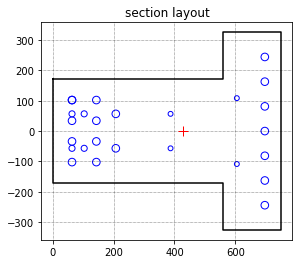

In [5]:
sect=MN.rctsSect(190,560,650,340,reinf_sect)
sect.plot()

## Import the properties

### Material properties

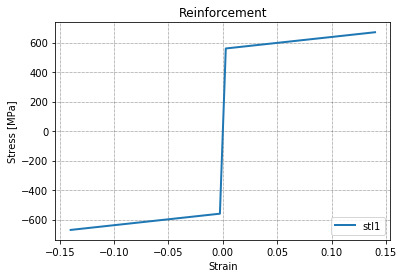

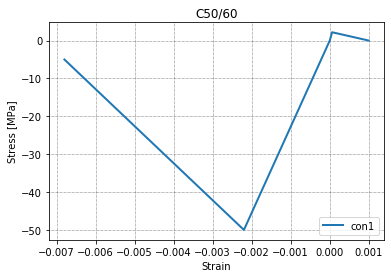

In [6]:
MNclass=MN.MNclass(concr,reinf,sect)
MNclass.materials()

## Strains and stresses within section

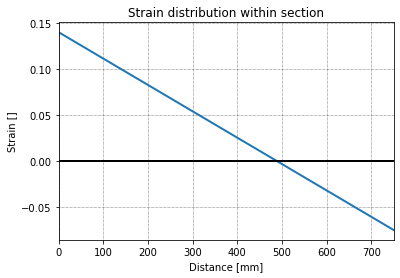

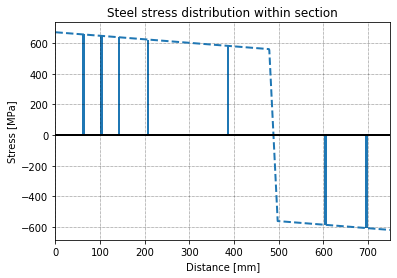

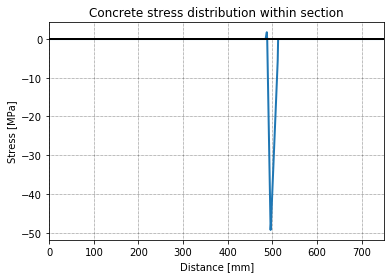

In [13]:
f_tot,m_tot,f_s,f_con=MNclass.calc(eps0=0.14,epsH=-0.075, plotting=True,eps_u=0.07,n_layers=800)

In [14]:
f_tot/1E3

1589.024585074068

In [15]:
m_tot/1E6

-1196.2465266156407

In [16]:
f_s

[-2081434.3166050105,
 -235090.64857772275,
 233681.7018570124,
 611097.5462248194,
 1251055.9484855304,
 406110.0747225481,
 411882.24592972646,
 1287132.018530395]